Optimisation PEIP2 - Polytech Nantes
====================

<IPython.core.display.Javascript object>


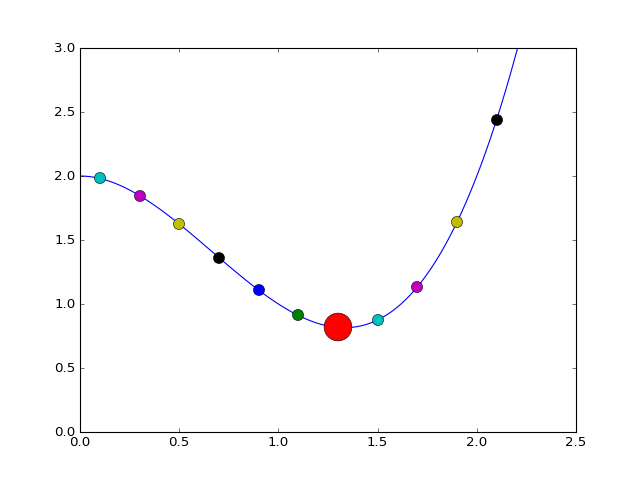

('abscisse ', -0.5, 'je trouve ', 1.38, "c'est une AMELIORATION !")
('abscisse ', -0.3, 'je trouve ', 1.79, "c'est pas interessant")
('abscisse ', -0.1, 'je trouve ', 1.98, "c'est pas interessant")
('abscisse ', 0.1, 'je trouve ', 1.98, "c'est pas interessant")
('abscisse ', 0.3, 'je trouve ', 1.85, "c'est pas interessant")
('abscisse ', 0.5, 'je trouve ', 1.63, "c'est pas interessant")
('abscisse ', 0.7, 'je trouve ', 1.36, "c'est une AMELIORATION !")
('abscisse ', 0.9, 'je trouve ', 1.11, "c'est une AMELIORATION !")
('abscisse ', 1.1, 'je trouve ', 0.91, "c'est une AMELIORATION !")
('abscisse ', 1.3, 'je trouve ', 0.82, "c'est une AMELIORATION !")
('abscisse ', 1.5, 'je trouve ', 0.88, "c'est pas interessant")
('abscisse ', 1.7, 'je trouve ', 1.13, "c'est pas interessant")
('abscisse ', 1.9, 'je trouve ', 1.64, "c'est pas interessant")
('abscisse ', 2.1, 'je trouve ', 2.44, "c'est pas interessant")
('abscisse ', 2.3, 'je trouve ', 3.59, "c'est pas interessant")
('Resultat final : la 

In [22]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from scipy import stats
from scipy.optimize import *

%matplotlib notebook
%config InlineBackend.figure_formats = {'png', 'retina'} # makes nicer graphics

f = lambda x: x**3-2*x**2+2
x = np.linspace(0,2.5,100)
plt.figure()
plt.plot(x,f(x))
plt.xlim([0,2.5])
plt.ylim([0,3])


# Algorithme 1 : bayalage exhaustif régulier

x_min = -0.5
x_max = 2.5
pas = 0.2
valeur_max = float("inf") # On initialise la valeur max à l'infini pour être sûr d'améliorer
meilleur_x = float("NaN") # On initialise avec Nan (Not a number) pour éviter une valeur arbitraire
x = x_min
while x < x_max : # on pourrait utiliser la fonction np.arange pour faire plus efficace
    if f(x) < valeur_max :
        meilleur_x = x
        valeur_max = f(x)
        print("abscisse ",round(x,2), "je trouve ",round(f(x),2), "c'est une AMELIORATION !")
    else :
        print("abscisse ",round(x,2), "je trouve ",round(f(x),2), "c'est pas interessant")
    x = x + pas
    plt.plot(x,f(x),'o',markersize=10)
print("Resultat final : la fonction f est minimale pour x=",round(meilleur_x,2))
plt.plot(meilleur_x,f(meilleur_x),'o',markersize=25)
plt.show()
        

* Quel avantage et quel inconvénient à prendre un pas plus fin ?
* Pour $f$ fixé, est-ce que l'algorithme parvient toujours à une solution proche du minimum ?

<IPython.core.display.Javascript object>


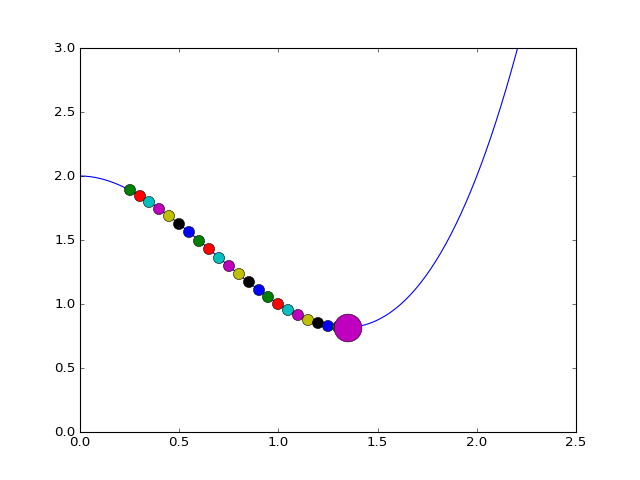

('position=', 0.25)
('position=', 0.3)
('position=', 0.35)
('position=', 0.4)
('position=', 0.45)
('position=', 0.5)
('position=', 0.55)
('position=', 0.6)
('position=', 0.65)
('position=', 0.7)
('position=', 0.75)
('position=', 0.8)
('position=', 0.85)
('position=', 0.9)
('position=', 0.95)
('position=', 1.0)
('position=', 1.05)
('position=', 1.1)
('position=', 1.15)
('position=', 1.2)
('position=', 1.25)
('position=', 1.3)
('position=', 1.35)
('position=', 1.35)
('position finale=', 1.35)


In [23]:
# Algorithme 2
x = np.linspace(0,2.5,100)
plt.figure()
plt.plot(x,f(x))
plt.xlim([0,2.5])
plt.ylim([0,3])

x_init=0.2 # Reglable
pas = 0.05 # Reglable
position = x_init

stabilisation=False

while stabilisation==False:
    if f(position+pas)<f(position):
        position=position+pas
        stabilisation=False
        
    elif f(position-pas)<f(position):
        position=position-pas
        stabilisation=False
        
    else:
        stabilisation=True
        
    print("position=",round(position,2))
    plt.plot(position,f(position),'o',markersize=10)
    
print("position finale=",round(position,2))
plt.plot(position,f(position),'o',markersize=25)  
plt.show()
    


In [ ]:

f = lambda x: x**3-2*x**2+2

# Algorithme 2
x = np.linspace(-0.5,2.5,100)
plt.figure()
plt.plot(x,f(x))
plt.xlim([-0.5,2.5])
plt.ylim([0,3])

x_init=0.2 # Reglable
pas = 0.05 # Reglable
position = x_init

stabilisation=False

while stabilisation==False:
    if f(position+pas)<f(position):
        position=position+pas
        stabilisation=False
        
    elif f(position-pas)<f(position):
        position=position-pas
        stabilisation=False
        
    else:
        stabilisation=True
        
    print("position=",round(position,2))
    plt.plot(position,f(position),'o',markersize=10)
    
print("position finale=",round(position,2))
plt.plot(position,f(position),'o',markersize=25)  
plt.show()

<IPython.core.display.Javascript object>


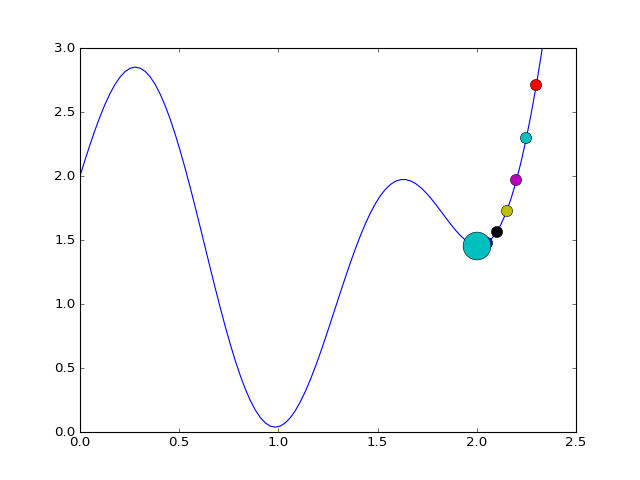

('position=', 2.35)
('position=', 2.3)
('position=', 2.25)
('position=', 2.2)
('position=', 2.15)
('position=', 2.1)
('position=', 2.05)
('position=', 2.0)
('position=', 2.0)
('position finale=', 2.0)


In [27]:
# Memes algorithmes, mais on modifie la fonction, il y a plusieurs optima !

f = lambda x: x**3-2*x**2+2 + np.sin(5*x)

# Algorithme 2
x = np.linspace(0,2.5,100)
plt.figure()
plt.plot(x,f(x))
plt.xlim([0,2.5])
plt.ylim([0,3])

x_init=2.4 # Reglable
pas = 0.05 # Reglable
position = x_init

stabilisation=False

while stabilisation==False:
    if f(position+pas)<f(position):
        position=position+pas
        stabilisation=False
        
    elif f(position-pas)<f(position):
        position=position-pas
        stabilisation=False
        
    else:
        stabilisation=True
        
    print("position=",round(position,2))
    plt.plot(position,f(position),'o',markersize=10)
    
print("position finale=",round(position,2))
plt.plot(position,f(position),'o',markersize=25)  
plt.show()

<IPython.core.display.Javascript object>


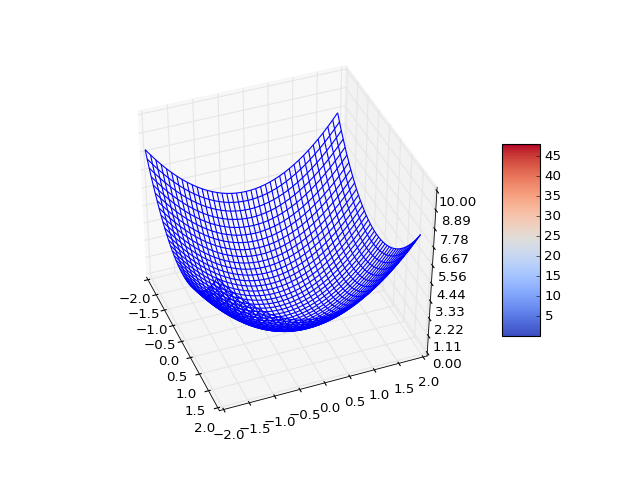

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = (X*X + Y*Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,                       linewidth=0, antialiased=False)
ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.set_zlim(0,7)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
